In [36]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
import imageio
from skimage.measure import label
from skimage.segmentation import watershed, expand_labels
from scipy import ndimage as ndi
from skimage.feature import peak_local_max

In [37]:
stack = imageio.mimread('embryo.tif')
np_stack = np.asarray(stack)
print(len(np_stack))
type(np_stack[0])

10


numpy.ndarray

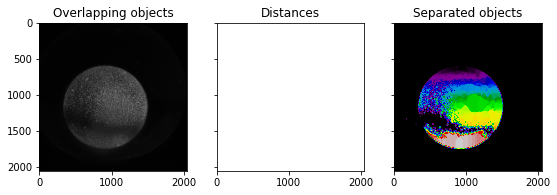

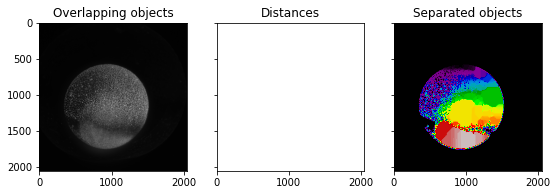

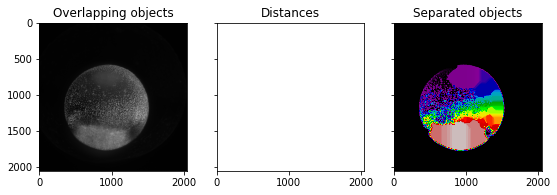

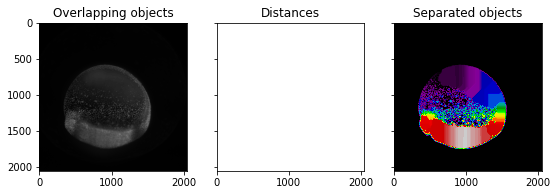

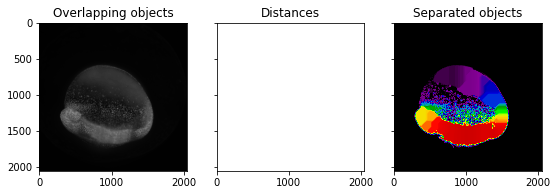

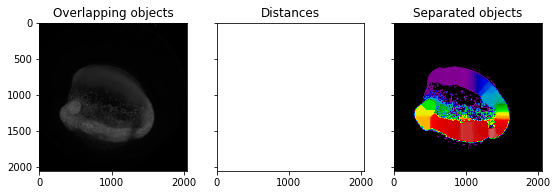

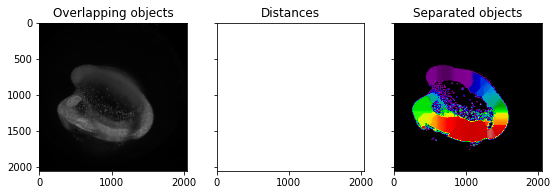

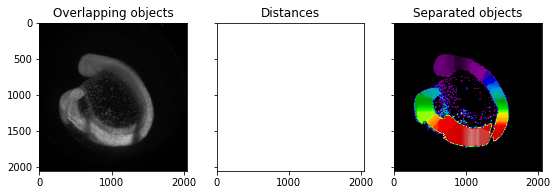

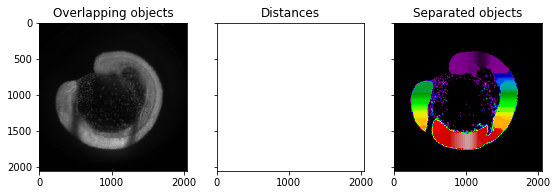

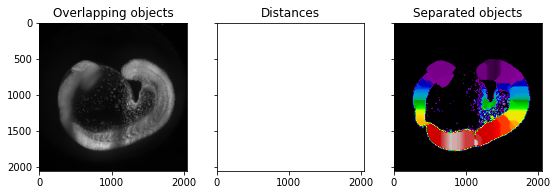

In [48]:
titles = ['Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(len(np_stack)):

    
    blur = cv.GaussianBlur(np_stack[i],(5,5),0)
    ret,th = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#     print("start")
    distance = ndi.distance_transform_edt(th)
    coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=th)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)
    labels = watershed(-distance, markers, mask=th)
    
    
    fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
    ax = axes.ravel()
    
    ax[0].imshow(np_stack[i], cmap=plt.cm.gray)
    ax[0].set_title('Overlapping objects')
    ax[1].imshow(-distance, cmap=plt.cm.gray)
    ax[1].set_title('Distances')
    ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
    ax[2].set_title('Separated objects')
    
    plt.show()

#     cv.imwrite(f'watershed{i}.png', labels)
#     print("end")
    
#     cv.waitKey(0)
#     images = [blur, 0, th]
#     for i in range(1):
#         plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
#         plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
#         plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
#         plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
#         plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
#         plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
#     plt.show()